In [104]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
def midval(a, b, c):
    maxx = max(max(a,b), c)
    minn = min(min(a, b), c)
    
    return a + b + c - maxx - minn


def egalpcmd(ve):
    
    ialp = 7
    
    alpcmd=np.empty(ve.size, dtype=object)
    
    for i, v in enumerate(ve):
        if (v < const["valp"][ialp] and ialp > 0):
            print(v, ialp)
            ialp = ialp - 1

        alpcmd_i = const["calp0"][ialp] +  v*const["calp1"][ialp] +  v**2*const["calp2"][ialp]
        alpcmd[i] = alpcmd_i
    
    return alpcmd

def aclam(ve):
    return min(const['dlallm'], const['aclam1'] + const['aclam2'] * ve)
    
def aclim(ve):
    return midval(const['aclim1'], const['aclim2'], const['aclim3'] + const['aclim4'] * ve)

In [106]:
const = {}

const['dlallm'] = 43
const['aclam1'] = 10
const['aclam2'] = 3.3e-3
const['aclim1'] = 37
const['aclim2'] = 10
const['aclim3'] = -15.5
const['aclim4'] = 2.5e-3
const["valp"] = [0, 500, 7500, 8500, 16000, 17000, 20000, 21000]
const["calp0"] = [5, 3.3, -74.7625, 30, 350 , -11.25, -511.25, 40]
const["calp1"] = [0, 3.3e-3, 0.0240833, 0, -0.04, 2.5e-3, 0.0525, 0]
const["calp2"] = [0, 0, -1.38333e-6, 0, 1.25e-6, 0, -1.25e-6, 0]


20990 7
19990 6
16990 5
15990 4
8490 3
7490 2
490 1


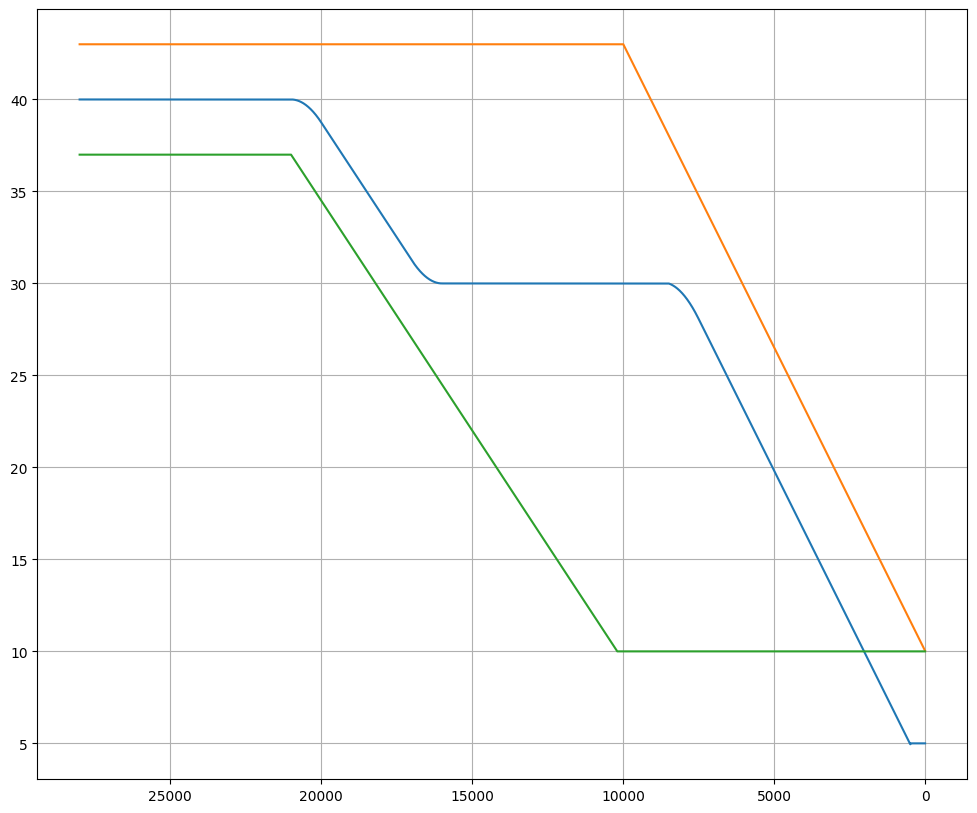

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
plt_ = ax

ialp = 9

ve = np.arange(28000, 0, -10)


alpcmd = egalpcmd(ve)
aclam_ = [aclam(v_) for v_ in ve]
aclim_ = [aclim(v_) for v_ in ve]

plt_.plot(ve, alpcmd)
plt_.plot(ve, aclam_)
plt_.plot(ve, aclim_)


plt_.grid();


plt_.invert_xaxis()